# Intel® Advisor - Offload Advisor

These sections demonstrate how to collect and generate a roofline report using Intel® Advisor, below we will examine our "offload" report.

##### Sections
- [What is Offload Advisor?](#What-is-Offload-Advisor?)
- _Analysis:_ [Offload Advisor Analysis](#Offload-Advisor-Analysis)
- [Modeling Flows Supported](#Modeling-Flows-Supported:-Now)
- [Offload and Non-Offload](#Top-Offload)
- [Offload Advisor Command Line Options](#Offload-Advisor-Compilation-and-Linking-Options)

## Learning Objectives
- Explain how Offload Advisor identifies and ranks parallelization opportunities for offload
- Run Offload Advisor with command line syntax
- Use Performance Models and analyze generated reports

## What is Offload Advisor?

Offload Advisor allows you to collect performance predictor data in addition to the profiling capabilities of Intel® Advisor. View output files containing metrics and performance data such as total speedup, fraction of code accelerated, number of loops and functions offloaded, and a call tree showing offloadable and accelerated regions.

## Offload Advisor Output Overview

<span style="color:blue">report.html</span>: Main report in HTML format

<span style="color:blue">report.csv</span> and <span style="color:blue">whole_app_metric.csv</span>: Comma-separated CSV files

<span style="color:blue">program_tree.dot:</span> A graphical representation of the call tree showing the offloadable and accelerated regions

<span style="color:blue">program_tree.pdf:</span> A graphical representation of the call tree generated if the DOT\(GraphViz*) utility is installed and a 1:1 conversion from the <span style="color:blue">program_tree.dot</span> file

<span style="color:blue">JSON</span> and <span style="color:blue">LOG</span> files that contain data used to generate the HTML report and logs, primarily used for debugging and reporting bugs and issues



## Offload Advisor Analysis

The below HTML report is <span style="color:blue"><b>live</b></span>, click navigation to see output.

[Intel Advisor Offload report](assets/offload.html)

### View the Report
Select the cell below and click run ▶ to view the analysis.

In [ ]:
import os
os.system('/bin/echo $(whoami) is running DPCPP_Essentials Module5 -- Intel Advisor - 1 of 2 offload.html')
from IPython.display import IFrame
IFrame(src='assets/offload.html', width=1024, height=1280)

## Modeling Flows Supported: Now

![image](assets/baseline.png)

## Modeling Flows Supported: Future

![image](assets/baseline2.png)

## Top Offload

Provides a detailed description of each loop interesting for offload
  * Timings (total time, time on the accelerator, speedup)
  * Offload metrics (offload taxe, data transfers)
  * Memory traffic (DRAM, L3, L2, L1), trip count
  * Highlight which part of the code should run on the accelerator
  
  ![image](assets/topoffload.png)


## Non Offload

Explains why Intel Advisor does not recommend a given loop for offload

  * Dependency issues
  * Not profitable
  * Total time is too small
  
  ![image](assets/nonoffload.png)

## Program Tree

The program tree offers another view of the proportion of code that can be offloaded to the accelerator

![image](assets/programtree.png)

## Offload Advisor Compilation and Linking Options
The only strict requirement for compilation and linking is full debug information:

   -g: 		Requests full debug information (compiler and linker)

Offload Advisor supports any optimization level, but the following setting is considered the optimal requirement:

   -O2: 	Requests moderate optimization


## How to "source" offload Advisor

To set up the Intel® Advisor Beta environment, run one of the shell script:
```bash
source <ONEAPI_INSTALL_DIR>/setvars.sh or source <ADV_INSTALL_DIR>/env/vars.sh
```
This script sets all required environment variables, including APM, which points to <span style="color:blue">\<ADV_INSTALL_DIR>\/perfmodels</span>
This is the location of the Offload Advisor scripts in the Intel® Advisor Beta installation directory.


## Additional Command Line Options
Easy to collect data and generate output with batch mode:
```bash
advixe-python <ADV_INSTALL_DIR>/perfmodels/run_oa.py <path_to_result_dir>  –config gen9 --out-dir <path_to_result_dir> [--options] -- <app>
```
By default, <span style="color:blue">run_oa.py</span> marks up all regions and only selects the most profitable ones for analysis.

To generate the report.html, uses the following command:
```bash
advixe-python $APM/analyse.py <project_dir> --config gen9 [--options] -- <app_binary> [app_options]
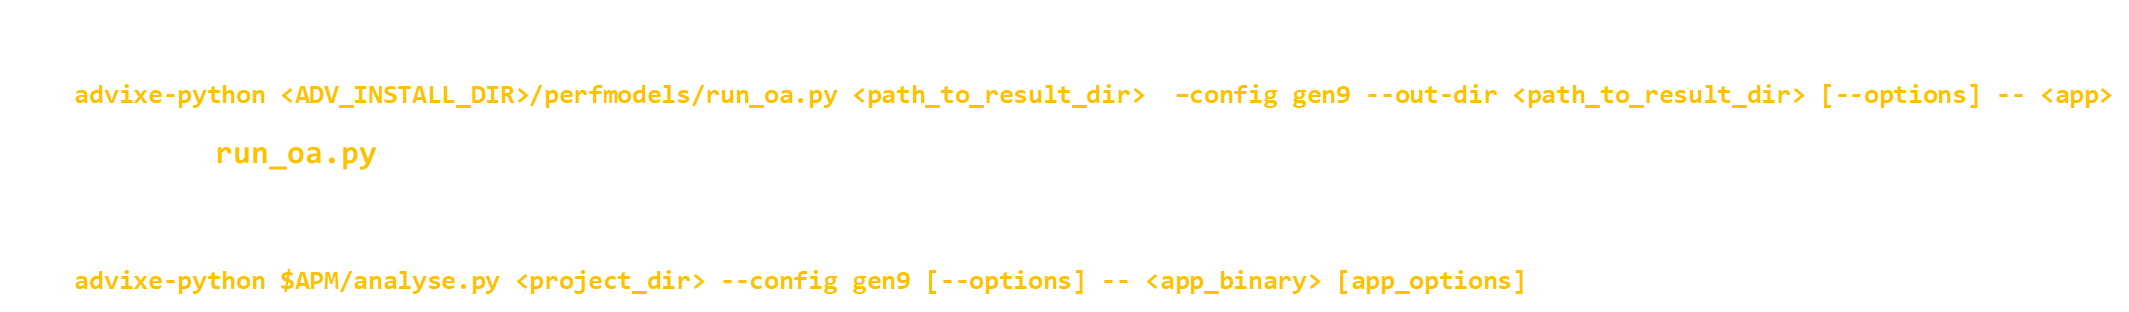
```

## What is Running When run_ao.py is called?

![What is happening when run_oa.py executes](assets/oapy.png)

## Dependency Checking

Dependency adds a lot of time to the collection and you might want to remove it.
Add the option –c basic for the collection:
```bash
advixe-python <ADV_INSTALL_DIR>/perfmodels/run_oa.py <path_to_result_dir>  –config gen9 –c basic --out-dir <path_to_result_dir> [--options] -- <app>
```
Add the option --assume-parallel for the analysis:

```bash
advixe-python $APM/analyse.py <project_dir> –-assume-parallel --config gen9 [--options] -- <app_binary> [app_options]
```

## Summary

  * Ran the Offload Advisor on a code sample.
  * Experimented with displaying various outputs.
  * Learned about additional command line options and how to speed up collection time.

<html><body><span style="color:green"><h2>Survey</h2></span></body></html>

[We would appreciate any feedback you’d care to give, so that we can improve the overall training quality and experience. Thanks! ](https://intel.az1.qualtrics.com/jfe/form/SV_0OZVTLvFGI2e0Id)

## Continue to Roofline Analysis
[Roofline Analysis](roofline_analysis.ipynb)